# Evaluating California Real Estate Market by Price-to-Rent Ratio

Categories of Interest:

Property Tax Rate (Average)

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
%matplotlib inline
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
def rename_col(col_name):
    years_list = list(range(2010,2017))
    col_list = ["CountyName"]
    for year in years_list:
        col_list.append(col_name+ "_{}".format(year))
    return col_list

def year_col():
    years_list = list(range(2010,2017))
    col_list = []
    for year in years_list:
        col_list.append("{}".format(year))
    return col_list

def rename_headers(df,col_name):
    level_headers(df)
    df.columns = rename_col(col_name)

def level_headers(df):
    df.reset_index(inplace=True)
    df.columns = df.columns.get_level_values(0)

## Reading & Cleaning Data

### 1) Price-to-rent data

In [3]:
pr = pd.read_csv("pricetorentratio.csv")
pr.head(3)

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,2010-10,2010-11,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12,2012-01,2012-02,2012-03,2012-04,2012-05,2012-06,2012-07,2012-08,2012-09,2012-10,2012-11,2012-12,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,2013-11,2013-12,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02
0,61639,10025,New York,NY,New York,New York,1,18.74,18.92,19.07,19.40,19.89,20.20,20.53,20.60,20.50,20.40,20.31,20.09,20.11,20.56,20.40,19.70,19.62,19.49,19.35,19.57,19.85,19.58,19.17,19.31,19.50,19.71,19.49,19.55,20.29,20.56,20.75,20.35,20.29,21.00,22.01,21.70,21.70,22.73,22.39,22.15,22.35,22.58,24.19,24.08,23.99,23.82,23.22,23.06,23.37,23.41,23.76,24.22,24.06,24.37,24.30,24.79,25.23,26.06,26.56,26.58,25.85,25.25,23.29,23.46,23.59,24.17,23.75,22.05,22.89,23.61,24.41,24.76,24.67,25.03,25.17,24.75,24.77,24.91,24.60,25.48,26.20,26.33,26.48,26.11,26.52,26.48,26.38,26.27,26.01
1,84654,60657,Chicago,IL,Chicago,Cook,2,13.27,13.20,13.20,13.31,13.36,13.50,13.23,13.10,12.98,12.68,12.58,12.46,12.46,12.35,12.34,12.42,12.22,11.96,11.93,11.90,11.84,11.88,12.16,12.15,12.08,12.11,12.18,12.05,12.03,11.96,12.01,12.18,12.00,11.89,11.78,11.96,12.28,12.47,12.56,12.84,12.94,12.79,12.61,12.57,12.51,12.32,12.23,12.26,12.33,12.30,12.36,12.57,12.43,12.48,12.40,12.38,12.37,12.36,12.33,12.39,12.27,12.30,12.41,12.36,12.45,12.36,12.36,12.53,12.45,12.45,12.38,12.40,12.52,12.68,12.85,12.99,13.07,13.12,13.11,13.02,12.85,12.80,12.75,12.70,12.78,13.00,13.05,13.05,13.10
2,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,3,9.51,9.51,9.47,9.43,9.45,9.47,9.43,9.38,9.30,9.23,9.18,9.15,9.15,9.18,9.19,9.18,9.17,9.15,9.13,9.11,9.11,9.11,9.11,9.13,9.16,9.24,9.34,9.38,9.38,9.43,9.51,9.55,9.60,9.64,9.69,9.73,9.81,9.84,9.87,9.91,9.85,9.84,10.02,10.13,10.24,10.24,10.28,10.31,10.38,10.61,10.75,10.82,10.89,10.98,11.06,11.18,11.31,11.45,11.51,11.61,11.70,11.77,11.97,12.12,12.26,12.40,12.40,12.41,12.49,12.55,12.58,12.66,12.70,12.80,12.86,12.94,13.04,13.20,13.28,13.37,13.33,13.25,13.25,13.40,13.57,13.61,13.65,13.68,13.73


In [4]:
# extracting CA real estate data from US real estate data using CA zip codes
# load california zip codes
ca_zip = pd.read_csv("CAzipcodes.csv")
#ca_zip.head(1)

In [5]:
# change zip_code column name to match "RegionName" in price-to-rent dataset
ca_zip.columns = ["RegionName"]
#ca_zip.head(1)

In [6]:
# merge ca_zip & pr to extract CA price-to-rent data, save merged dataframe into new variable "ca_pr"
ca_pr = pd.merge(pr,ca_zip)

year_list = list(range(2010,2019))
for year in year_list:
    ca_pr[str(year)] = 0

index = 0
for year in ca_pr.iloc[:,7:].columns.values:
    if "-01" in year:
        index += 1
    else:
        ca_pr[str(year_list[index])] += ca_pr[year]

ca_pr = ca_pr[["CountyName","2010","2011","2012","2013","2014","2015","2016"]]

ca_pr = ca_pr.groupby(["CountyName"]).mean()
#rename_headers(ca_pr,"Price_to_Rent")
level_headers(ca_pr)

for year in ca_pr.iloc[:,1:].columns.values:
    if "_2010" in year:
        ca_pr[year] = ca_pr[year].apply(lambda x: (x*4)/12)
    else:
        ca_pr[year] = ca_pr[year].apply(lambda x: x/12)
        
ca_pr.head(3)
#ca_pr.dtypes
#display(ca_pr)

,CountyName,2010,2011,2012,2013,2014,2015,2016
0,Alameda,4.520981,15.286870,15.722685,18.498389,18.413870,17.758648,17.951500
1,Amador,3.012262,11.358333,13.574286,14.663333,14.129167,14.327262,13.528929
2,Butte,2.837292,11.212153,11.354653,12.230000,13.130903,13.066250,13.371111


### 2) Unemployment Rate (%) 2010-2016

In [7]:
path = os.getcwd()
files = os.listdir(path)
lfd_xlsx = [f for f in files if f[-4:]=='xlsx' and f[0:3]=='lfd']
lfd = pd.DataFrame()
for f in lfd_xlsx:
    data = pd.read_excel(f)
    lfd = lfd.append(data)
    
lfd.columns = lfd.iloc[4]
lfd.columns = ['LAUS','2011','2012','2013','2014','2015','2016','STATEFIPSCODE','COUNTYFIPSCODE','COUNTYNAME/STATEABBR','YEAR','_','LABORFORCE','EMPLOYED','UNEMPLOYED','UNEMPLOYMENTRATE(%)']
lfd = lfd.iloc[5:]
lfd['CountyName'],lfd['STATEABBR'] = lfd['COUNTYNAME/STATEABBR'].str.split(',',1).str
lfd = lfd.drop(lfd.columns[[0,1,2,3,4,5,6,7,8,9,11]],axis=1)
lfd = lfd.dropna(how="any")
lfd = lfd.loc[lfd['STATEABBR']==' CA']
lfd.head(3)

,YEAR,LABORFORCE,EMPLOYED,UNEMPLOYED,UNEMPLOYMENTRATE(%),CountyName,STATEABBR
191,2010,782522,697112,85410,10.9,Alameda County,CA
192,2010,542,472,70,12.9,Alpine County,CA
193,2010,15507,13326,2181,14.1,Amador County,CA


In [8]:
# changing county names to match price-to-rent county names for merge
lfd["CountyName"] = lfd["CountyName"].apply(lambda x: ' '.join([w for w in x.split() if not 'County' in w]))
# extract unemployment rate (%) per year
unemployment_rate = lfd.pivot_table(index="CountyName",columns="YEAR",values=["UNEMPLOYMENTRATE(%)"],aggfunc="first")
rename_headers(unemployment_rate,"UnemploymentRate(%)")
#unemployment_rate.columns.values[1:8] = rename_col()
unemployment_rate.head(3)
#print(lfd_year.to_string())

,CountyName,UnemploymentRate(%)_2010,UnemploymentRate(%)_2011,UnemploymentRate(%)_2012,UnemploymentRate(%)_2013,UnemploymentRate(%)_2014,UnemploymentRate(%)_2015,UnemploymentRate(%)_2016
0,Alameda,10.9,10.1,8.7,7.2,5.8,4.7,4.2
1,Alpine,12.9,12.8,11.2,9.7,8.2,7.3,6.5
2,Amador,14.1,13.6,12.3,10.3,8.3,6.6,5.9


### 3) Population Total 2010-2016

In [9]:
f = pd.ExcelFile("CAcountypop.xlsx")
pop = pd.DataFrame()
year = 2010
for sheet in f.sheet_names:
    if "E5CountyState" in sheet and "2017" not in sheet:
            sub_pop = pd.read_excel(f,sheet,skiprows=3).assign(Year=year)
            pop = pop.append(sub_pop)
            year += 1
    
pop = pop[["COUNTY","Total","Total.1","Vacancy Rate","Year"]]
pop.columns = ["CountyName","Population Total","Housing Units Total","Vacancy Rate","Year"]
pop = pop.drop(pop.index[[59]])
pop = pop.dropna(how="any")
display(pop)
#print(list(pop.columns.values))
#print(pop.to_string())

,CountyName,Population Total,Housing Units Total,Vacancy Rate,Year
0,Alameda,1510271.0,581372.0,0.064203,2010
1,Alpine,1175.0,1760.0,0.717614,2010
2,Amador,38091.0,18032.0,0.192047,2010
3,Butte,220000.0,95835.0,0.085741,2010
4,Calaveras,45578.0,27925.0,0.323688,2010
5,Colusa,21419.0,7883.0,0.104909,2010
6,Contra Costa,1049025.0,400263.0,0.062207,2010
7,Del Norte,28610.0,11186.0,0.114339,2010
8,El Dorado,181058.0,88159.0,0.203451,2010
9,Fresno,930450.0,315531.0,0.082844,2010


In [10]:
# extract population totals per year
pop_year = pop.pivot_table(index="CountyName",columns="Year",values=["Population Total"],aggfunc="first")
rename_headers(pop_year,"Total_Population")
#pop_year.columns.values[1:8] = rename_col()
pop_year.head(3)
#display(pop_year)

,CountyName,Total_Population_2010,Total_Population_2011,Total_Population_2012,Total_Population_2013,Total_Population_2014,Total_Population_2015,Total_Population_2016
0,Alameda,1510271.0,1525695.0,1543027.0,1567091.0,1588348.0,1611318.0,1629233.0
1,Alpine,1175.0,1169.0,1166.0,1164.0,1163.0,1163.0,1160.0
2,Amador,38091.0,38011.0,37945.0,37304.0,37815.0,37764.0,37667.0


 ### 4) Vacancy Rate 2010-2016

In [11]:
vacancy_year = pop.pivot_table(index="CountyName",columns="Year",values=["Vacancy Rate"],aggfunc="first")
rename_headers(vacancy_year,"Vacancy_Rate")
#vacancy_year.columns.values[1:8] = rename_col()
vacancy_year.head(3)

,CountyName,Vacancy_Rate_2010,Vacancy_Rate_2011,Vacancy_Rate_2012,Vacancy_Rate_2013,Vacancy_Rate_2014,Vacancy_Rate_2015,Vacancy_Rate_2016
0,Alameda,0.064203,0.063045,0.057916,0.051747,0.050178,0.048556,0.041431
1,Alpine,0.717614,0.717701,0.718661,0.719932,0.720406,0.720970,0.722722
2,Amador,0.192047,0.192977,0.197228,0.201992,0.203116,0.204261,0.204238


### 5) Housing Units 2010-2016

In [12]:
housing_units_year = pop.pivot_table(index="CountyName",columns="Year",values=["Housing Units Total"],aggfunc="first")
rename_headers(housing_units_year,"Total_Housing_Units")
#housing_units_year.columns.values[1:8] = rename_col()
housing_units_year.head(3)

,CountyName,Total_Housing_Units_2010,Total_Housing_Units_2011,Total_Housing_Units_2012,Total_Housing_Units_2013,Total_Housing_Units_2014,Total_Housing_Units_2015,Total_Housing_Units_2016
0,Alameda,581372.0,582727.0,584049.0,586474.0,588948.0,591235.0,593662.0
1,Alpine,1760.0,1757.0,1763.0,1771.0,1774.0,1774.0,1778.0
2,Amador,18032.0,18054.0,18111.0,18174.0,18167.0,18163.0,18170.0


### 6) Crime Rate 2010-2016

In [13]:
crime = pd.read_csv("CAcrimes.csv",sep=',', error_bad_lines=False, index_col=False, dtype='unicode')
# change dtype for dataframe fr. objects to integers
crime = crime.apply(pd.to_numeric,errors="ignore")
# change persistent object types to integers 
crime_obj = ["TotalStructural_sum","TotalMobile_sum","TotalOther_sum","GrandTotal_sum","GrandTotClr_sum"]
for obj in crime_obj:
    crime[obj] = pd.to_numeric(crime[obj],errors="coerce")
# sum selected column data for total crime
col_list = list(crime)
col_list = [col for col in col_list if col not in {'Year','County','NCICCode'}]
crime["Total Crime"] = crime[col_list].sum(axis=1)
# select only Years 2010-2016
crime = crime[(crime["Year"] >= 2010) & (crime["Year"] < 2017)]
crime = crime.rename(columns={"County":"CountyName"})
crime["CountyName"] = crime["CountyName"].apply(lambda x: ' '.join([w for w in x.split() if not 'County' in w]))
#print(col_list)
crime.head(3)
#crime.dtypes

,Year,CountyName,NCICCode,Violent_sum,Homicide_sum,ForRape_sum,Robbery_sum,AggAssault_sum,Property_sum,Burglary_sum,VehicleTheft_sum,LTtotal_sum,ViolentClr_sum,HomicideClr_sum,ForRapeClr_sum,RobberyClr_sum,AggAssaultClr_sum,PropertyClr_sum,BurglaryClr_sum,VehicleTheftClr_sum,LTtotalClr_sum,TotalStructural_sum,TotalMobile_sum,TotalOther_sum,GrandTotal_sum,GrandTotClr_sum,RAPact_sum,ARAPact_sum,FROBact_sum,KROBact_sum,OROBact_sum,SROBact_sum,HROBnao_sum,CHROBnao_sum,GROBnao_sum,CROBnao_sum,RROBnao_sum,BROBnao_sum,MROBnao_sum,FASSact_sum,KASSact_sum,OASSact_sum,HASSact_sum,FEBURact_Sum,UBURact_sum,RESDBUR_sum,RNBURnao_sum,RDBURnao_sum,RUBURnao_sum,NRESBUR_sum,NNBURnao_sum,NDBURnao_sum,NUBURnao_sum,MVTact_sum,TMVTact_sum,OMVTact_sum,PPLARnao_sum,PSLARnao_sum,SLLARnao_sum,MVLARnao_sum,MVPLARnao_sum,BILARnao_sum,FBLARnao_sum,COMLARnao_sum,AOLARnao_sum,LT400nao_sum,LT200400nao_sum,LT50200nao_sum,LT50nao_sum,Total Crime
834,2010,Fresno,CA Highway Patrol - Fresno,1,0,0,0,1,217,1,193,23,0,0,0,0,0,5,0,5,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,170,12,11,0,0,0,0,23,0,0,0,0,0,0,0,23,689.0
835,2011,Fresno,CA Highway Patrol - Fresno,3,0,0,0,3,194,2,160,32,2,0,0,0,2,12,0,12,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,1,1,0,0,0,0,2,0,0,2,140,4,16,0,0,0,2,30,0,0,0,0,0,0,0,32,655.0
836,2012,Fresno,CA Highway Patrol - Fresno,2,0,0,1,1,212,0,187,25,2,0,0,1,1,13,0,13,0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,144,20,23,0,0,0,0,25,0,0,0,0,0,0,0,25,698.0


In [14]:
# consolidate total crimes per year
crime_year = crime.pivot_table(index="CountyName",columns="Year",values=["Total Crime"],aggfunc="first")
level_headers(crime_year)
crime_year.head(3)
#display(crime_year)

,CountyName,Total Crime,Total Crime,Total Crime,Total Crime,Total Crime,Total Crime,Total Crime
0,Alameda,12533.0,12434.0,13876.0,12796.0,11283.0,10780.0,11767.0
1,Alpine,359.0,486.0,209.0,178.0,128.0,207.0,168.0
2,Amador,2643.0,3117.0,2587.0,2480.0,2147.0,1917.0,2138.0


In [15]:
# calculate crime rate 
crime_rate = crime_year.iloc[:,1:]/pop_year.iloc[:,1:].values
#crime_rate.columns = rename_col()
rename_headers(crime_rate,"Crime_Rate")
crime_rate["CountyName"] = crime_year["CountyName"]
crime_rate.head(3)
#display(crime_rate)

,CountyName,Crime_Rate_2010,Crime_Rate_2011,Crime_Rate_2012,Crime_Rate_2013,Crime_Rate_2014,Crime_Rate_2015,Crime_Rate_2016
0,Alameda,0.008299,0.008150,0.008993,0.008165,0.007104,0.006690,0.007222
1,Alpine,0.305532,0.415740,0.179245,0.152921,0.110060,0.177988,0.144828
2,Amador,0.069386,0.082003,0.068178,0.066481,0.056776,0.050763,0.056761


### 7) School Total 2010-2016

#### A) Private Schools

In [16]:
ps_xls = [f for f in files if f[-3:]=='xls' and f[0:2]=='ps']
ps_data = pd.DataFrame()
year = 2010
for f in ps_xls:
    data = pd.read_excel(f,skiprows=3).assign(Year=year)
    ps_data = ps_data.append(data)
    year += 1

ps_data = ps_data[["County","Year"]]
ps_data = ps_data.dropna(how="any")
ps_data["Private_School_Count"] = 1
ps_data = ps_data.rename(columns={"County":"CountyName"})
#ps_data.head(3)
#display(ps_data)
#ps_data.head(3)

In [17]:
# modify data to extract number of private schools per year
ps = ps_data.pivot_table(index="CountyName",columns="Year",values=["Private_School_Count"],aggfunc="sum")
ps = ps.fillna(0)
ps_year = ps
level_headers(ps_year)
ps_year = ps_year.drop(ps_year.index[[51]])
#ps_year.head(3)
#display(ps_year)
#print(ps_year.to_string())

#### B) Public Schools

In [18]:
pubs_data = pd.read_excel("pubschls.xlsx")

pubs_data = pubs_data[["County","OpenDate","ClosedDate","LastUpDate"]]
pubs_data["TMP"] = pubs_data.OpenDate.values # create temporary column out of the index
pubs_data = pubs_data[pubs_data.TMP.notnull()] # remove all NaT values
pubs_data.drop(["TMP"], axis=1, inplace=True) # delete temporary column 
pubs_data["OpenYear"] = pd.DatetimeIndex(pubs_data['OpenDate']).year
pubs_data["ClosedYear"] = pd.DatetimeIndex(pubs_data['ClosedDate']).year
for year in range(2010, 2017):
    # Create a column of 0s
    pubs_data[year] = 0
    # Where the year is between OpenYear and ClosedYear (or closed year is NaN) set it to 1
    pubs_data.loc[(pubs_data['OpenYear'] <= year) & ((pubs_data['ClosedYear'].isnull()) | (pubs_data['ClosedYear'] >= year)), year] += int(1)
pubs_data = pubs_data.rename(columns={"County":"CountyName"})
#pubs_data.head(3)

In [19]:
# consolidate number of public schools per year
pubs_year = pubs_data[["CountyName",2010,2011,2012,2013,2014,2015,2016]]
pubs_year = pubs_year.groupby(["CountyName"]).sum()
level_headers(pubs_year)
#pubs_year.head(3)
#display(pubs_year)

#### C) Total Number of Schools

In [20]:
col_list = ["CountyName","2010","2011","2012","2013","2014","2015","2016"]
pub = pubs_year
pub.columns = col_list
priv = ps
#priv.reset_index(inplace=True)
priv.columns = priv.columns.get_level_values(0)
priv.columns = col_list

# add public schools and private schools together to get total number of schools per year
sch_total = pub.iloc[:,1:].add(priv.iloc[:,1:],fill_value=0)

#rename_headers(sch_total,"Total_Schools")
sch_total["CountyName"] = pub["CountyName"]
#display(sch_total)
sch_total.head(3)

,2010,2011,2012,2013,2014,2015,2016,CountyName
0,580.0,568.0,576.0,560.0,557.0,556.0,549.0,Alameda
1,7.0,4.0,4.0,4.0,3.0,3.0,3.0,Alpine
2,18.0,18.0,16.0,16.0,17.0,16.0,17.0,Amador


### 8) Building Permits 2010-2016

In [21]:
bp_xls = [f for f in files if f[-3:]=='csv' and f[0:2]=='bp']
bp_data = pd.DataFrame()
for f in bp_xls:
    data = pd.read_csv(f,sep=',', error_bad_lines=False, index_col=False, dtype='unicode')
    bp_data = bp_data.append(data)

bp_data = bp_data.iloc[2:,:]
bp_data = bp_data[["Survey","FIPS","County","Unnamed: 6","Unnamed: 9","Unnamed: 12","Unnamed: 15"]]
# extract CA building permits fr. US data
bp_data["FIPS"] = bp_data["FIPS"].apply(pd.to_numeric,errors="coerce")
bp_data = bp_data[bp_data["FIPS"]==6]
bp_data.columns = ["Year","FIPS","CountyName","1_unit_bldgs","2_unit_bldgs","3-4_unit_bldgs","5+_unit_bldgs"]
#change data type for bldg columns fr. object to integer
for col in bp_data.columns.values[3:]:
    bp_data[col] = bp_data[col].apply(pd.to_numeric,errors="coerce")
# sum bldg columns to get total building permits column 
col_list = list(bp_data)
col_list = [col for col in col_list if col not in {'Year','CountyName'}]
bp_data["Total_bldgs"] = bp_data[col_list].sum(axis=1)
bp_data["CountyName"] = bp_data["CountyName"].apply(lambda x: ' '.join([w for w in x.split() if not 'County' in w]))
#print(list(bp_data.columns.values))
bp_data.head(3)

,Year,FIPS,CountyName,1_unit_bldgs,2_unit_bldgs,3-4_unit_bldgs,5+_unit_bldgs,Total_bldgs
180,2010,6.0,Alameda,879,22,8,26,941.0
181,2010,6.0,Alpine,4,0,0,0,10.0
182,2010,6.0,Amador,29,0,0,0,35.0


In [22]:
# extract building permits per county per year
bp_year = bp_data.pivot_table(index="CountyName",columns="Year",values=["Total_bldgs"],aggfunc="sum")
rename_headers(bp_year,"Total_Building_Permits")
#bp_year.columns.values[1:8] = rename_col()
bp_year.head(3)
#display(bp_year)

,CountyName,Total_Building_Permits_2010,Total_Building_Permits_2011,Total_Building_Permits_2012,Total_Building_Permits_2013,Total_Building_Permits_2014,Total_Building_Permits_2015,Total_Building_Permits_2016
0,Alameda,941.0,898.0,1479.0,1480.0,1659.0,2039.0,2548.0
1,Alpine,10.0,9.0,7.0,6.0,9.0,10.0,8.0
2,Amador,35.0,86.0,116.0,20.0,28.0,33.0,47.0


### 9) Average Property Tax Rate 2010-2016

In [23]:
ptax_xlsx = [f for f in files if f[-4:]=='xlsx' and f[0:2]=='pt']
ptax_data1 = pd.DataFrame()
ptax_data2 = pd.DataFrame()
year = 2010
for f in ptax_xlsx:
    if "10" in f or "11" in f:
        data = pd.read_excel(f,skiprows=8).assign(Year=year)
        ptax_data1 = ptax_data1.append(data)
    else:
        data = pd.read_excel(f,skiprows=4).assign(Year=year)
        ptax_data2 = ptax_data2.append(data)
    year += 1

ptax_data1 = ptax_data1[["1","8","Year"]]
ptax_data1.columns = ["CountyName","Average Property Tax Rate","Year"]

ptax_data2 = ptax_data2[["County  ","Average \ntax rate","Year"]]
ptax_data2.columns = ["CountyName","Average Property Tax Rate","Year"]

ptax_data = pd.DataFrame()
ptax_data = ptax_data.append(ptax_data1)
ptax_data = ptax_data.append(ptax_data2)
#display(ptax_data1)
#ptax_data1.head(3)
#print(list(ptax_data2.columns.values))
ptax_data.head(3)

,CountyName,Average Property Tax Rate,Year
0,Alameda,0.01207,2010
1,Alpine,0.01000,2010
2,Amador,0.01017,2010


In [24]:
# extract average property tax per year 
ptax_year = ptax_data.pivot_table(index="CountyName",columns="Year",values=["Average Property Tax Rate"],aggfunc="first")
ptax_year = ptax_year.dropna(how="any")
rename_headers(ptax_year,"Average_Property_Tax")
#ptax_year.columns.values[1:8] = rename_col()
ptax_year.head(3)
#display(ptax_year)

,CountyName,Average_Property_Tax_2010,Average_Property_Tax_2011,Average_Property_Tax_2012,Average_Property_Tax_2013,Average_Property_Tax_2014,Average_Property_Tax_2015,Average_Property_Tax_2016
0,Alameda,0.01207,0.01215,0.01222,0.01222,0.01224,0.01224,0.01224
1,Alpine,0.01000,0.01000,0.01000,0.01000,0.01000,0.01000,0.01000
2,Amador,0.01017,0.01017,0.01017,0.01017,0.01017,0.01017,0.01017


### 10) Job Growth 2010-2016

In [25]:
bg_xls = [f for f in files if f[-3:]=='xls' and f[0:2]=='bg']
bg_data = pd.DataFrame()
year = 2010
for f in bg_xls:
    data = pd.read_excel(f,skiprows=7).assign(Year=year)
    bg_data = bg_data.append(data)
    year += 1

bg_data = bg_data.drop(bg_data.columns[[0,1,12,13,14]],axis=1)
bg_data = bg_data.dropna(how="any")
bg_data = bg_data.rename(columns={"Counties":"CountyName"})

col_list = list(bg_data)
col_list = [col for col in col_list if col not in {'Year','CountyName'}]
bg_data["Total_Businesses"] = bg_data[col_list].sum(axis=1)
#bg_data.head(3)
#print(bg_data.columns.values)

In [26]:
bg_year = bg_data.pivot_table(index="CountyName",columns="Year",values=["Total_Businesses"],aggfunc="sum")
#rename_headers(bg_year,"Total_Businesses")
bg_year.columns = [year_col()]
level_headers(bg_year)
bg_year = bg_year.drop(bg_year.index[[56,5]])
bg_year.head(3)
#display(bg_year)

,CountyName,2010,2011,2012,2013,2014,2015,2016
0,Alameda,49015.0,50785.0,47291.0,49182.0,50606.0,52579.0,54397.0
1,Alpine,72.0,84.0,91.0,87.0,90.0,85.0,84.0
2,Amador,909.0,910.0,880.0,900.0,916.0,947.0,960.0


## Comparing averages to find potential correlations (2010-2016)

Note: create a test pairplot (take 2010 columns in each dataframe and append to new dataframe for pairplot), find correlations, if any exist create a new dataframe with 2010-2016 average and create a new pairplot) 
*pairplot only plots numerical values, each point on plot represents a county 

1) Come up with graphs (histograms, scatterplots, boxplots) to find relationships between two datasets
2) Use statistical analysis to prove a positive or negative reltationships between the two datasets (pvalue, ttestsm etc.) 
3) Create a new column with Year values, groupby year for visualization over time (create a new dataframe for yearly analysis, 6 rows is fine for analysis)
 - Plot two lines in 1 graph (i.e comparing crime rate vs. pricetorent over time) do for each market variable

*come up with multiple visualizations to find different patterns in the data 

- derive questions from columns (try to infer which relationships will be stronger or weaker based on the data), draw visualizations to help visualize relationships (look to UNIT 2 for examples, single variable/columns analysismarket fluctuations])

1 ) Single variable analysis (histogram, boxplot)

2) How data changes over time

2) Multivariable analysis (plotting multiple columns in one graph) --> Crime Rate vs. Vacancy Rate over time (Year)

Notes:

- Only normalize data when comparing two different columns 

https://github.com/maf5509/accident_capstone/blob/master/Untitled.ipynb (project example)

In [27]:
# 2010-2016 averages
# avg price-to-rent ratio 
ca_pr["avg_price_to_rent"] = ca_pr.iloc[:,7:82].mean(axis=1)
# avg unemployment rate 
unemployment_rate["avg_unemployment_rate"] = unemployment_rate.mean(axis=1)
# avg population total
pop_year["avg_pop_total"] = pop_year.mean(axis=1)
# avg vacancy rate 
vacancy_year["avg_vacancy_rate"] = vacancy_year.mean(axis=1)
# avg housing units
housing_units_year["avg_housing_units"] = housing_units_year.mean(axis=1)
# avg crime rate
crime_rate["avg_crime_rate"] = crime_rate.mean(axis=1)
# avg total schools
sch_total["avg_school_total"] = sch_total.mean(axis=1)
# avg building permits
bp_year["avg_building_permits"] = bp_year.mean(axis=1)
# avg property tax
ptax_year["avg_property_tax"] = ptax_year.mean(axis=1)
# avg job growth
bg_year["avg_job_growth"] = bg_year.mean(axis=1)

ca_market_data = pd.DataFrame()
ca_market_data["CountyName"] = crime_rate["CountyName"]
data_list = [ca_pr,unemployment_rate,pop_year,vacancy_year,housing_units_year,crime_rate,sch_total,bp_year,ptax_year,bg_year]
for data in data_list:
    col_list = list(data.columns.values)
    ca_market_data[col_list[-1]] = data[col_list[-1]]

ca_market_data = ca_market_data.dropna(how="any")
#display(ca_market_data)
#ca_pr.iloc[:,7:83].head(3)

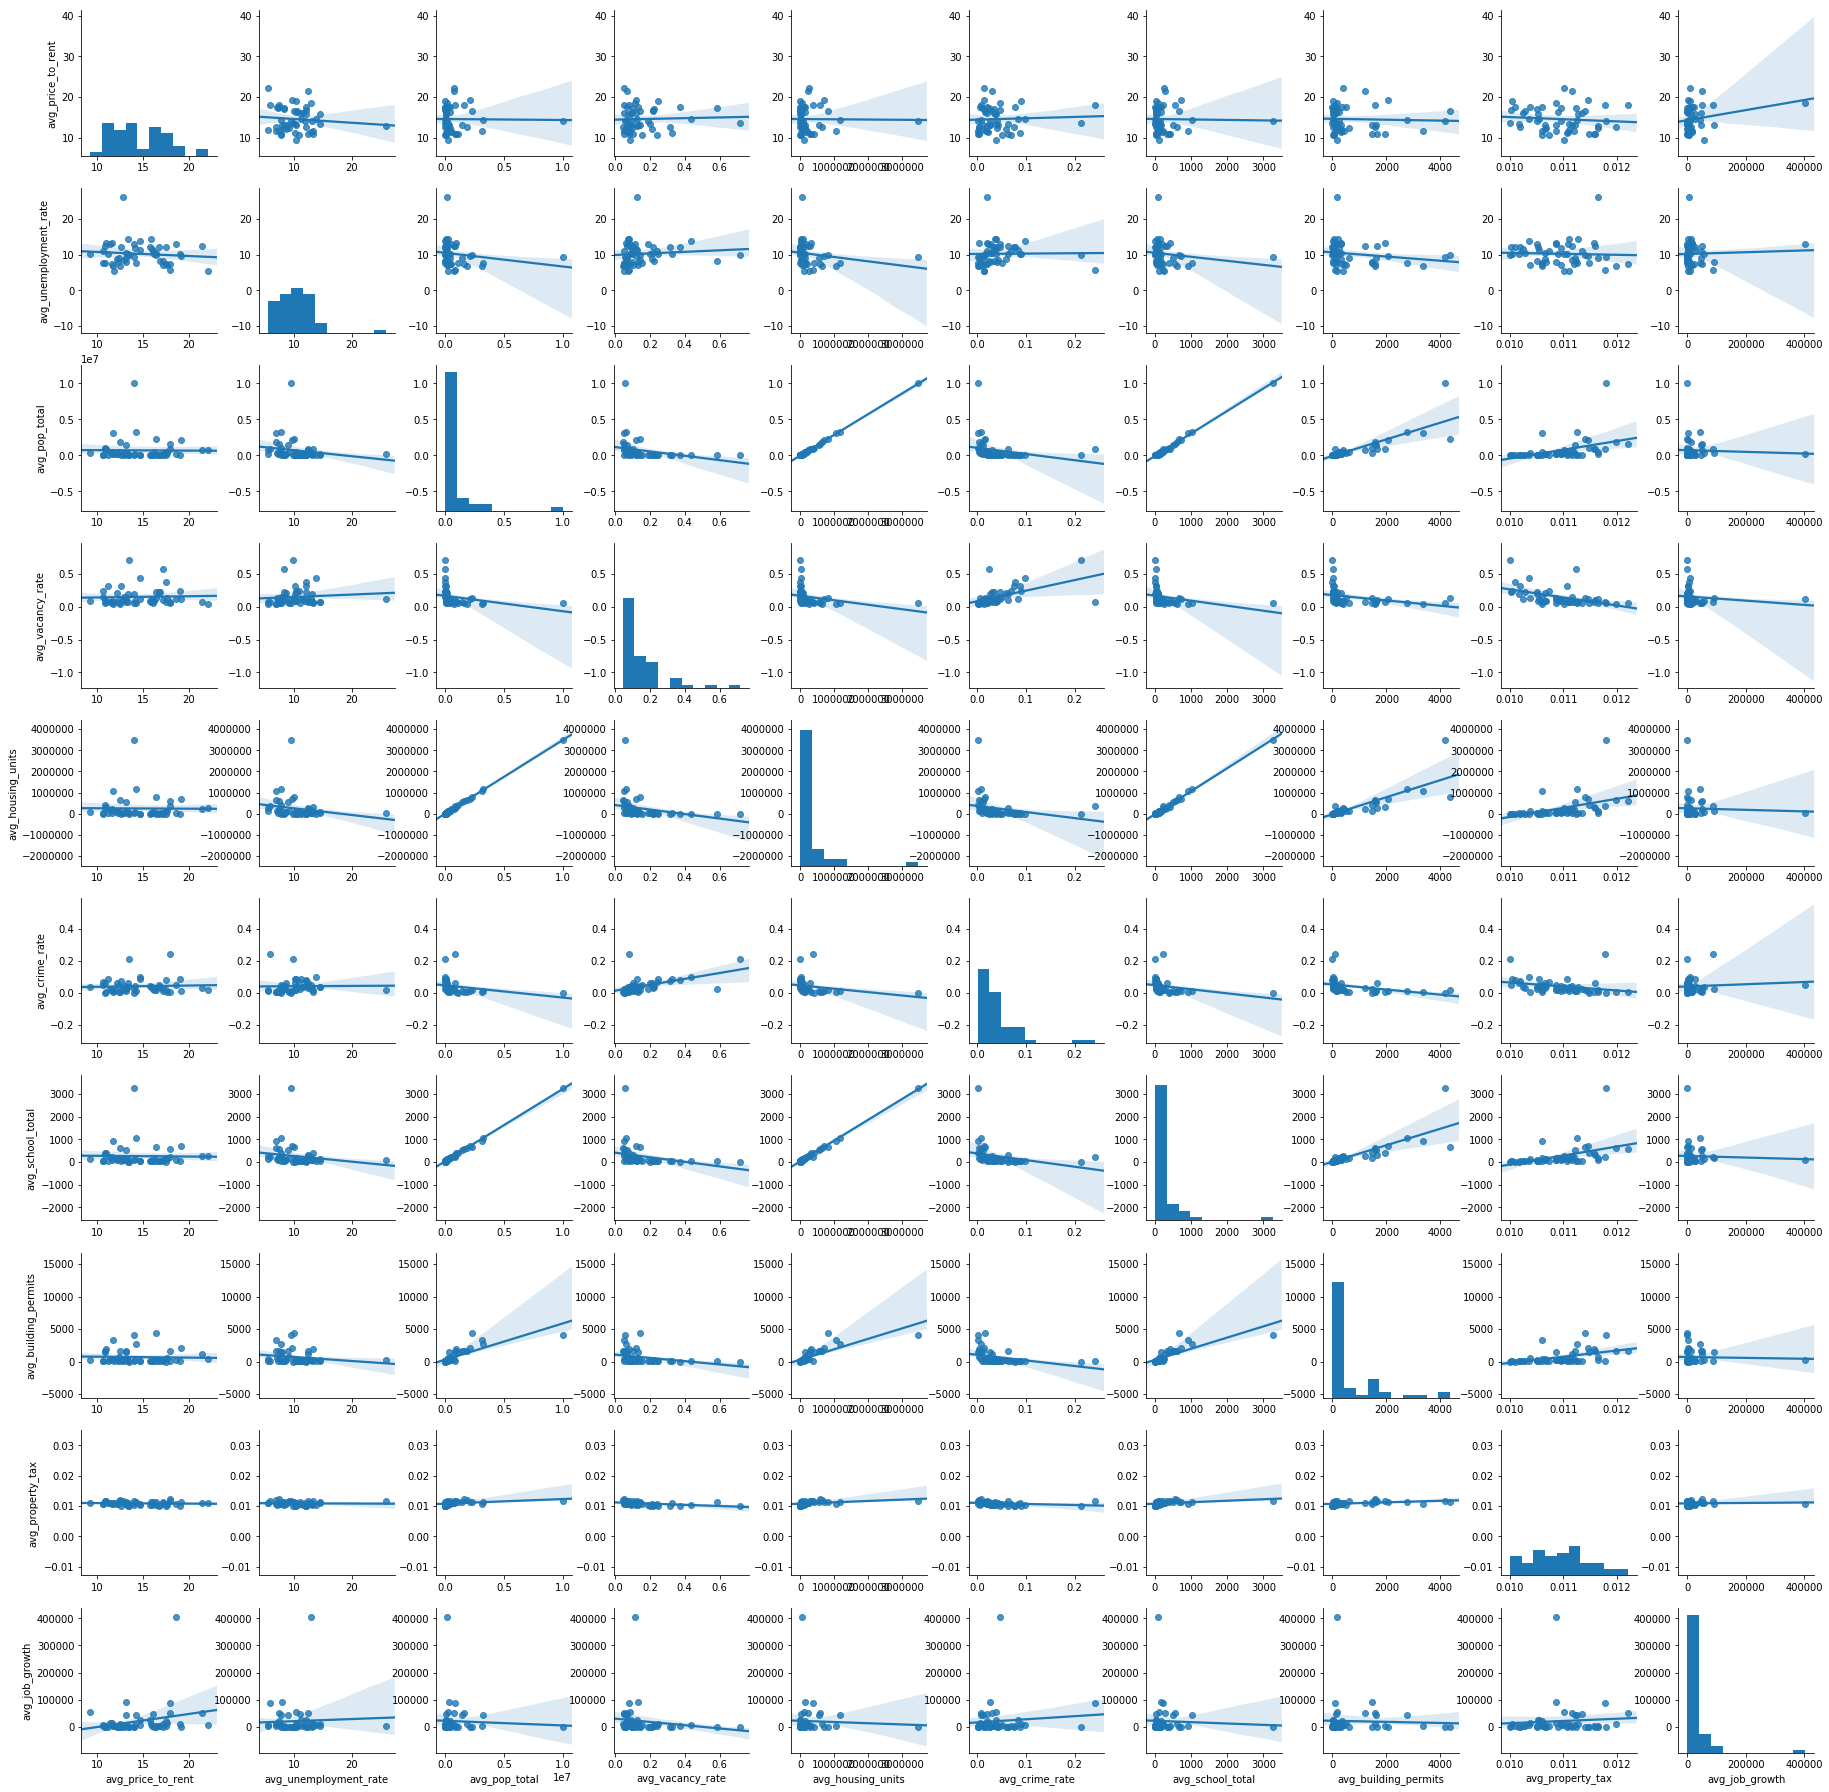

In [28]:
# plot dataframe into seaborn pairplot to find potential correlations between data (avg. 2010-2016)
plt.rcParams['figure.figsize']=(20,20)
sns.pairplot(ca_market_data,kind="reg")

Possible correlations:

A) Positive

Price-to-rent vs : Population Total, Housing Units, School Total, Building Permits, Property Tax

B) Negative

Price-to-rent vs : Unemployment Rate, Vacancy Rate, Crime Rate

## CA Market Data Frequency 

C:\Users\Guest\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


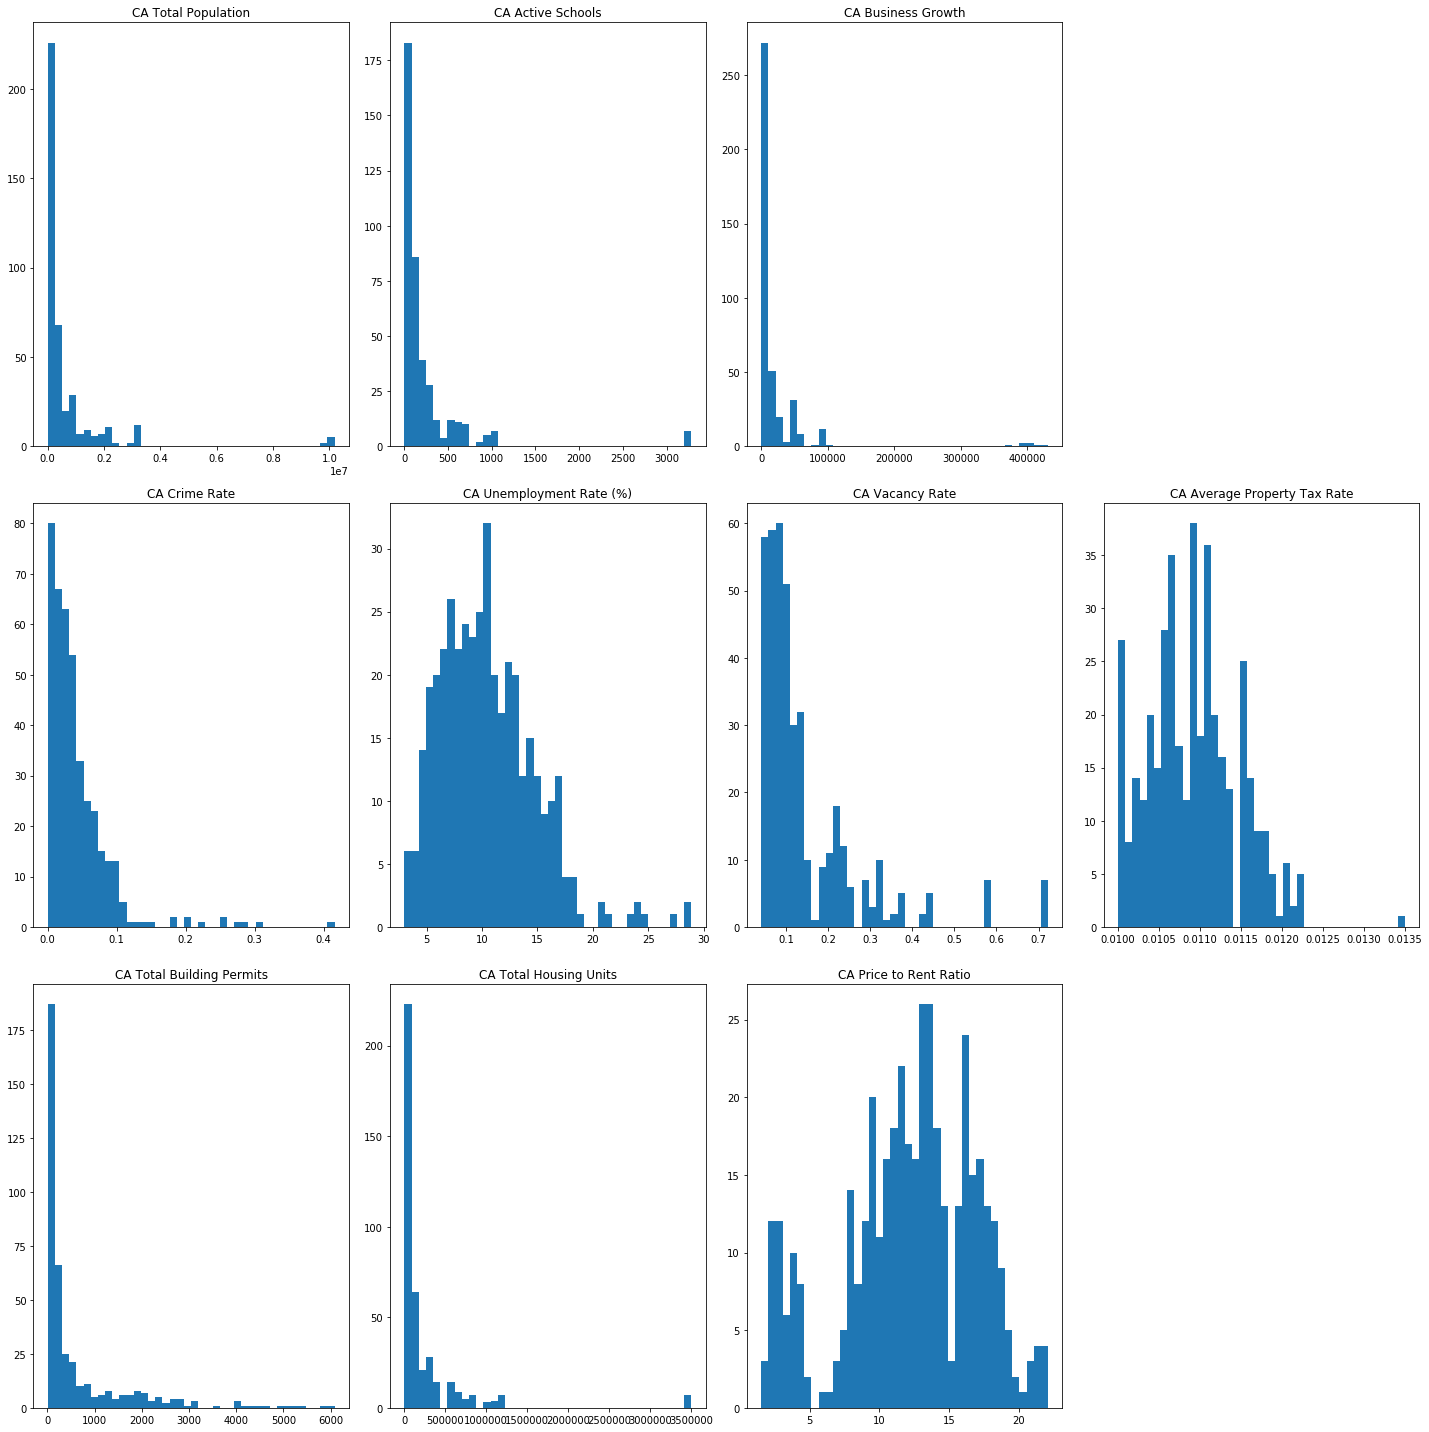

In [29]:
def add_year_col(df):
    x = pd.melt(df,id_vars=["CountyName"], var_name='Year')
    x = x[["Year","value"]]
    return x

plt.rcParams['figure.figsize']=(20,20)
fig,ax = plt.subplots(nrows=3,ncols=4)

# fix total school data
sch_freq = sch_total.iloc[:,1:9]
sch_freq = add_year_col(sch_freq)

# fix business growth data
bg_freq = bg_year.iloc[:,:8]
bg_freq = add_year_col(bg_freq)

# fix crime rate data
cr_freq = crime
years_list = list(range(2010,2017))
col_list = ["CountyName"]
for year in years_list:
    col_list.append("{}".format(year))
cr_freq = crime_rate.drop('avg_crime_rate',axis=1)
cr_freq.columns = col_list
cr_freq = add_year_col(cr_freq)

# fix unemployment rate data
ur_freq = lfd[["YEAR","UNEMPLOYMENTRATE(%)"]]
ur_freq["UNEMPLOYMENTRATE(%)"] = ur_freq["UNEMPLOYMENTRATE(%)"].apply(pd.to_numeric,errors="coerce")

# fix property tax rate data
ptax_freq = ptax_data.dropna(how="any")
ptax_freq = ptax_freq.drop(ptax_freq.index[[58]])

# fix price-to-rent data
pr_freq = add_year_col(ca_pr)

ax[0,0].hist(pop["Population Total"],bins=40)
ax[0,0].set_title("CA Total Population")
ax[0,1].hist(sch_freq["value"],bins=40)
ax[0,1].set_title("CA Active Schools")
ax[0,2].hist(bg_freq["value"],bins=40)
ax[0,2].set_title("CA Business Growth")
ax[1,0].hist(cr_freq["value"],bins=40)
ax[1,0].set_title("CA Crime Rate")
ax[1,1].hist(ur_freq["UNEMPLOYMENTRATE(%)"],bins=40)
ax[1,1].set_title("CA Unemployment Rate (%)")
ax[1,2].hist(pop["Vacancy Rate"],bins=40)
ax[1,2].set_title("CA Vacancy Rate")
ax[1,3].hist(ptax_freq["Average Property Tax Rate"],bins=40)
ax[1,3].set_title("CA Average Property Tax Rate")
ax[2,0].hist(bp_data["Total_bldgs"],bins=40)
ax[2,0].set_title("CA Total Building Permits")
ax[2,1].hist(pop["Housing Units Total"],bins=40)
ax[2,1].set_title("CA Total Housing Units")
ax[2,2].hist(pr_freq["value"],bins=40)
ax[2,2].set_title("CA Price to Rent Ratio")

for i in [3,11]:
    fig.delaxes(ax.flatten()[i])
fig.tight_layout()
plt.show()

## Finding Potential Outliers in CA Market Data

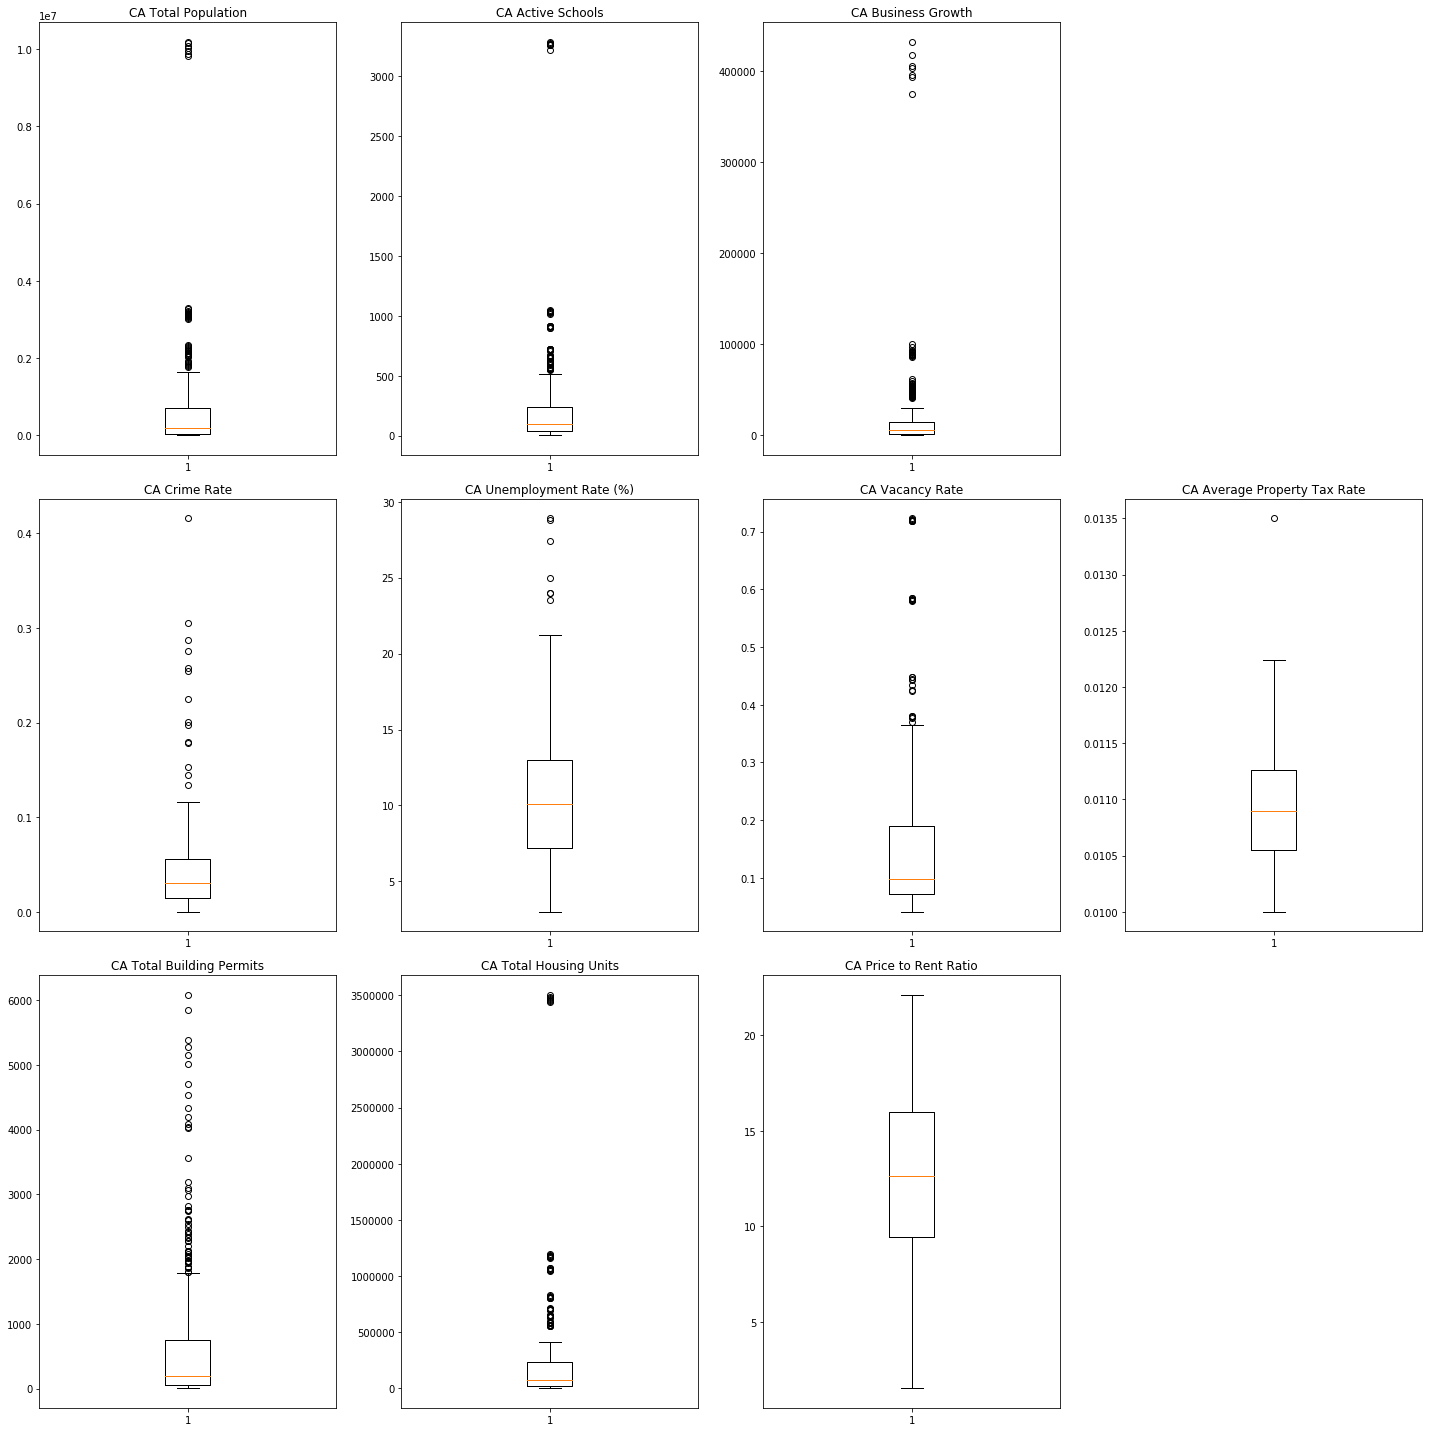

In [30]:
plt.rcParams['figure.figsize']=(20,20)
fig,ax = plt.subplots(nrows=3,ncols=4)

ax[0,0].boxplot(pop["Population Total"])
ax[0,0].set_title("CA Total Population")
ax[0,1].boxplot(sch_freq["value"])
ax[0,1].set_title("CA Active Schools")
ax[0,2].boxplot(bg_freq["value"])
ax[0,2].set_title("CA Business Growth")
ax[1,0].boxplot(cr_freq["value"])
ax[1,0].set_title("CA Crime Rate")
ax[1,1].boxplot(ur_freq["UNEMPLOYMENTRATE(%)"])
ax[1,1].set_title("CA Unemployment Rate (%)")
ax[1,2].boxplot(pop["Vacancy Rate"])
ax[1,2].set_title("CA Vacancy Rate")
ax[1,3].boxplot(ptax_freq["Average Property Tax Rate"])
ax[1,3].set_title("CA Average Property Tax Rate")
ax[2,0].boxplot(bp_data["Total_bldgs"])
ax[2,0].set_title("CA Total Building Permits")
ax[2,1].boxplot(pop["Housing Units Total"])
ax[2,1].set_title("CA Total Housing Units")
ax[2,2].boxplot(pr_freq["value"])
ax[2,2].set_title("CA Price to Rent Ratio")

for i in [3,11]:
    fig.delaxes(ax.flatten()[i])
fig.tight_layout()
plt.show()

## CA market analysis over time

C:\Users\Guest\Anaconda3\lib\site-packages\ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


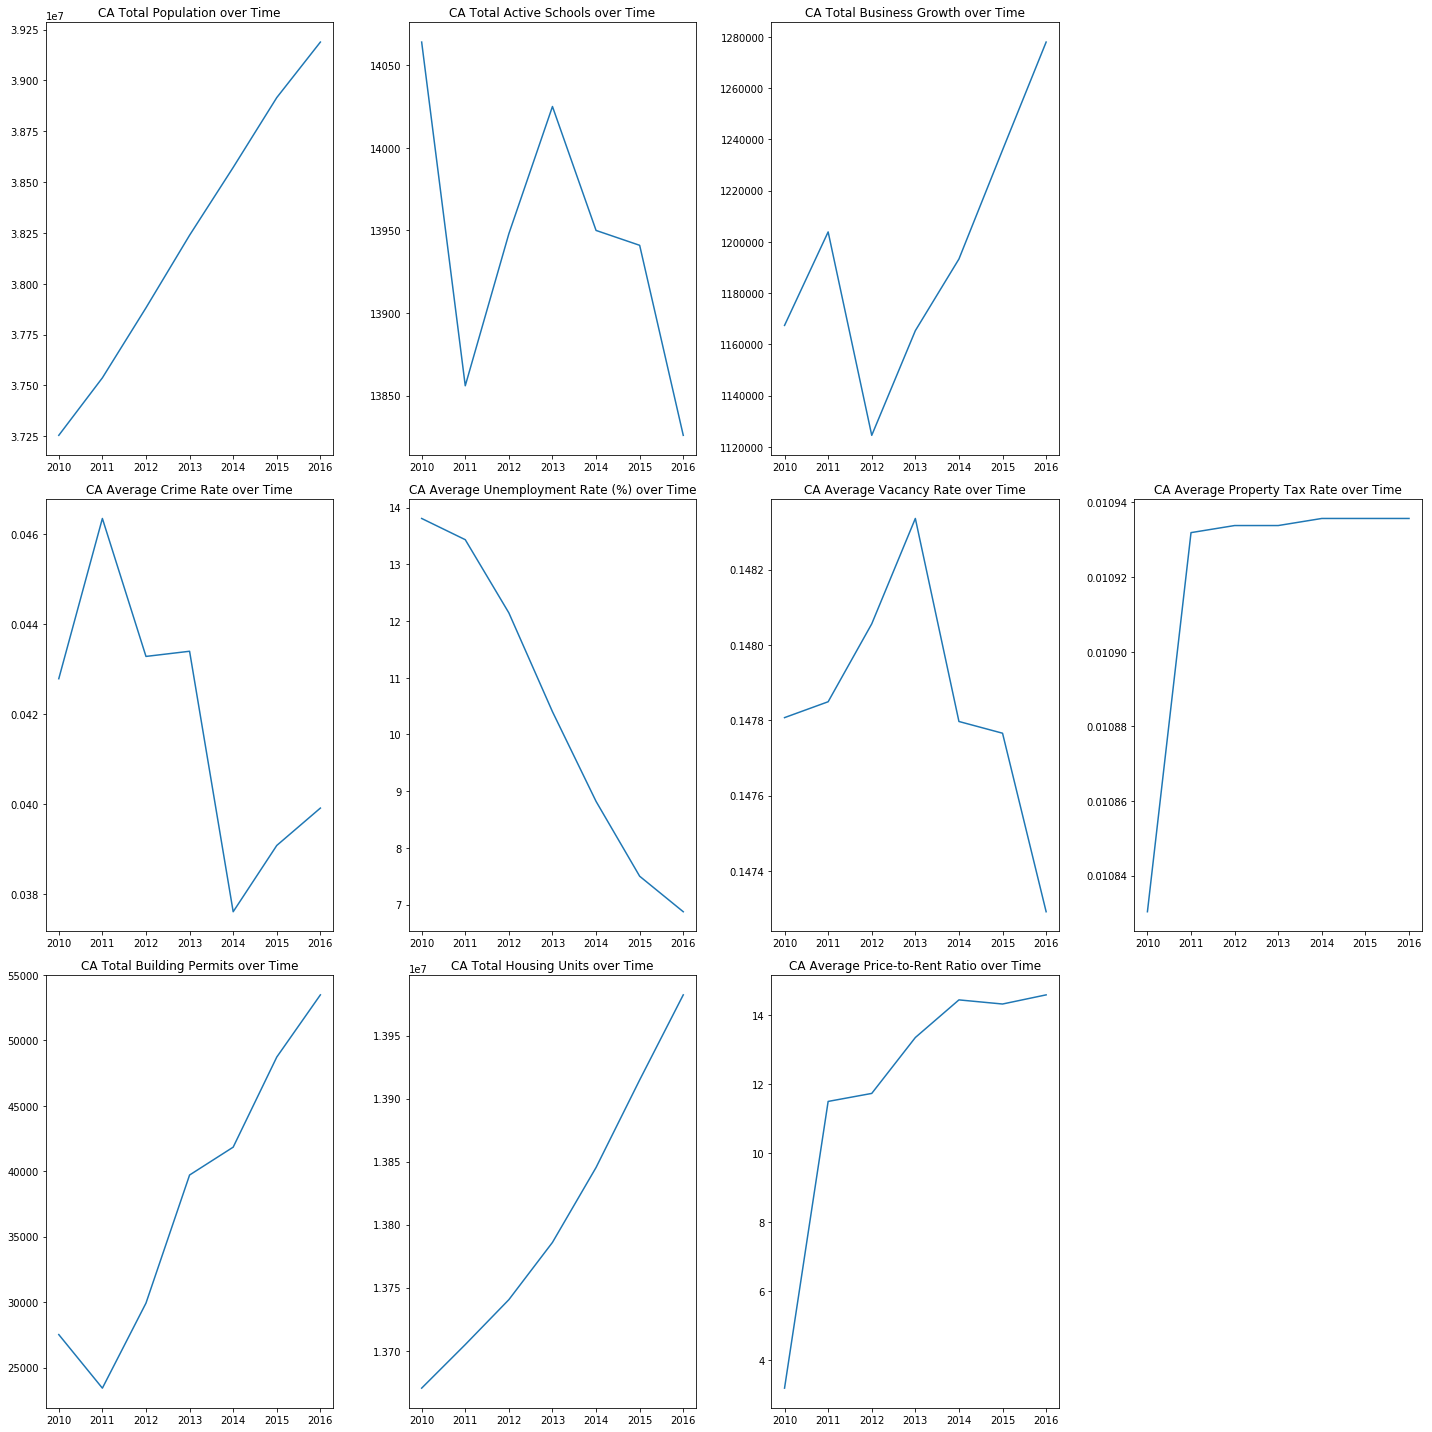

In [31]:
# population
pop_total_yr = pop.groupby(["Year"]).sum()
level_headers(pop_total_yr)
pop_total_yr = pop_total_yr[["Year","Population Total"]]

# price-to-rent
pr_avg = add_year_col(ca_pr)
pr_avg = pr_avg.groupby(["Year"]).mean()
level_headers(pr_avg)
pr_avg = pr_avg.drop(pr_avg.index[[7]])

# total number of open schools
sch_total_yr = add_year_col(sch_total)
sch_total_yr = sch_total_yr.groupby(["Year"]).sum()
level_headers(sch_total_yr)
sch_total_yr = sch_total_yr.drop(sch_total_yr.index[[7]])

# total number of businesses
bg_total_yr = add_year_col(bg_year)
bg_total_yr = bg_total_yr.groupby(["Year"]).sum()
level_headers(bg_total_yr)
bg_total_yr = bg_total_yr.drop(bg_total_yr.index[[7]])

# total number of building permits
bp_total_yr = bp_data[["Year","Total_bldgs"]]
bp_total_yr = bp_total_yr.groupby(["Year"]).sum()
level_headers(bp_total_yr)

# total housing units
hu_total_yr = pop[["Housing Units Total","Year"]]
hu_total_yr = hu_total_yr.groupby(["Year"]).sum()
level_headers(hu_total_yr)

# crime rate
cr_total_yr = cr_freq
cr_total_yr = cr_total_yr.groupby(["Year"]).mean()
level_headers(cr_total_yr)

# unemployment rate
ur_total_yr = lfd[["YEAR","UNEMPLOYMENTRATE(%)"]]
ur_total_yr["UNEMPLOYMENTRATE(%)"] = ur_total_yr["UNEMPLOYMENTRATE(%)"].apply(pd.to_numeric,errors="coerce")
ur_total_yr = ur_total_yr.groupby(["YEAR"]).mean()
level_headers(ur_total_yr)

# vacancy rate
vac_total_yr = pop[["Vacancy Rate","Year"]]
vac_total_yr = vac_total_yr.groupby(["Year"]).mean()
level_headers(vac_total_yr)

# property tax rate 
ptax_total_yr = ptax_freq[["Average Property Tax Rate","Year"]]
ptax_total_yr = ptax_total_yr.dropna(how="any")
ptax_total_yr = ptax_total_yr.groupby(["Year"]).mean()
level_headers(ptax_total_yr)


fig,ax = plt.subplots(nrows=3,ncols=4)

ax[0,0].plot(pop_total_yr["Year"],pop_total_yr["Population Total"])
ax[0,0].set_title("CA Total Population over Time")
ax[2,2].plot(pr_avg["Year"],pr_avg["value"])
ax[2,2].set_title("CA Average Price-to-Rent Ratio over Time")
ax[0,2].plot(bg_total_yr["Year"],bg_total_yr["value"])
ax[0,2].set_title("CA Total Business Growth over Time")
ax[0,1].plot(sch_total_yr["Year"],sch_total_yr["value"])
ax[0,1].set_title("CA Total Active Schools over Time")
ax[2,0].plot(bp_total_yr["Year"],bp_total_yr["Total_bldgs"])
ax[2,0].set_title("CA Total Building Permits over Time")
ax[2,1].plot(hu_total_yr["Year"],hu_total_yr["Housing Units Total"])
ax[2,1].set_title("CA Total Housing Units over Time")
ax[1,0].plot(cr_total_yr["Year"],cr_total_yr["value"])
ax[1,0].set_title("CA Average Crime Rate over Time")
ax[1,1].plot(ur_total_yr["YEAR"],ur_total_yr["UNEMPLOYMENTRATE(%)"])
ax[1,1].set_title("CA Average Unemployment Rate (%) over Time")
ax[1,2].plot(vac_total_yr["Year"],vac_total_yr["Vacancy Rate"])
ax[1,2].set_title("CA Average Vacancy Rate over Time")
ax[1,3].plot(ptax_total_yr["Year"],ptax_total_yr["Average Property Tax Rate"])
ax[1,3].set_title("CA Average Property Tax Rate over Time")
for i in [3,11]:
    fig.delaxes(ax.flatten()[i])
fig.tight_layout()
plt.show()

## How does the population growth affect the price-to-rent ratio?

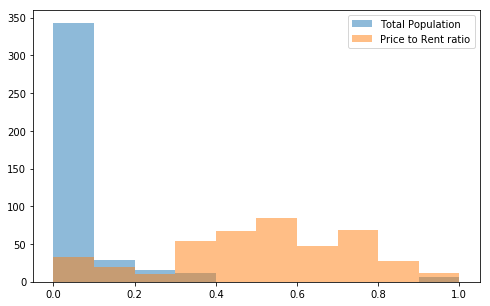

In [71]:
plt.rcParams['figure.figsize']=(8,5)

def normalize_data(df):
    x = (df-df.min())/(df.max()-df.min())
    return x

comp_pop = pop["Population Total"]
comp_pr = pr_freq["value"]
pop_norm = normalize_data(comp_pop)
pr_norm = normalize_data(comp_pr)

def graph_plots(df1,df1_title,df2,df2_title):
    plt.hist(df1, alpha=0.5, label= df1_title) 
    plt.hist(df2, alpha=0.5, label=df2_title) 
    plt.legend(loc='upper right') 
    return plt.show()

graph_plots(pop_norm,"Total Population",pr_norm,"Price to Rent ratio")
#display(pr_norm)

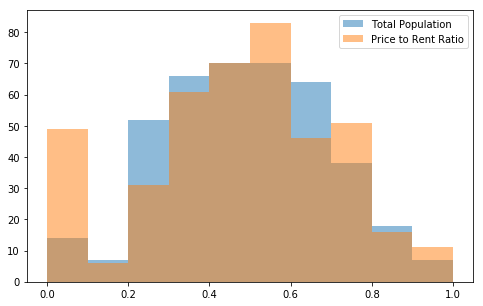

In [72]:
# transform to normal distribution for comparative analysis
def transform_data(df):
    from scipy import stats
    x,_ = stats.boxcox(df)
    return x

pop_trans = transform_data(comp_pop)
pr_trans = transform_data(comp_pr)
pop_norm2 = normalize_data(pop_trans)
pr_norm2 = normalize_data(pr_trans)
graph_plots(pop_norm2,"Total Population",pr_norm2,"Price to Rent Ratio")

In [73]:
def test_data(df1_non_trans,df2_non_trans,df1_trans,df2_trans):
    from scipy.stats import ttest_ind
    print("Before transforming data:")
    print(ttest_ind(df1_non_trans, df2_non_trans, equal_var=False))
    print("After transforming data:")
    print(ttest_ind(df1_trans, df2_trans, equal_var=False))
    
test_data(pop_norm,pr_norm,pop_norm2,pr_norm2)

Before transforming data:
Ttest_indResult(statistic=-34.425739537068822, pvalue=2.6353889770856285e-153)
After transforming data:
Ttest_indResult(statistic=1.5642353012346581, pvalue=0.11814798436378043)


## How does the number of active schools affect the price-to-rent ratio?

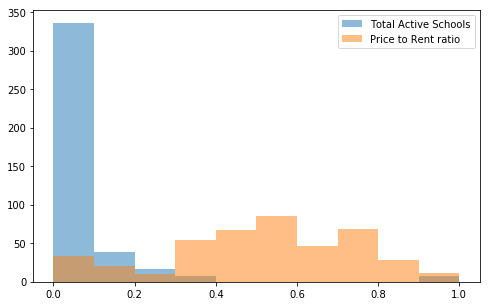

In [74]:
comp_sch = sch_freq["value"]
sch_norm = normalize_data(comp_sch)

graph_plots(sch_norm,"Total Active Schools",pr_norm,"Price to Rent ratio")

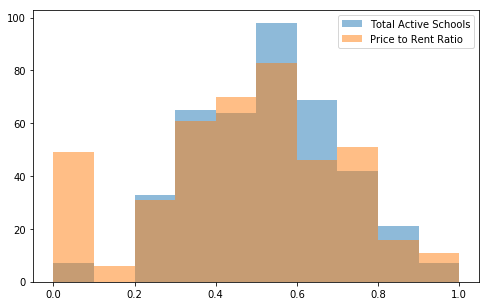

In [75]:
sch_trans = transform_data(comp_sch)
sch_norm2 = normalize_data(sch_trans)

graph_plots(sch_norm2,"Total Active Schools",pr_norm2,"Price to Rent Ratio")

In [78]:
test_data(sch_norm,pr_norm,sch_norm2,pr_norm2)

Before transforming data:
Ttest_indResult(statistic=-33.912816515062602, pvalue=3.3706868691015606e-150)
After transforming data:
Ttest_indResult(statistic=3.7733142164530689, pvalue=0.00017301417561678498)


## How does the business growth affect price-to-rent ratio?

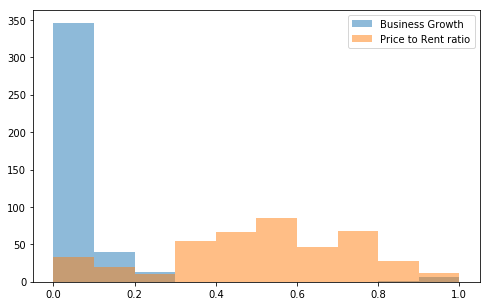

In [80]:
comp_bg = bg_freq["value"]
bg_norm = normalize_data(comp_bg)

graph_plots(bg_norm,"Business Growth",pr_norm,"Price to Rent Ratio")

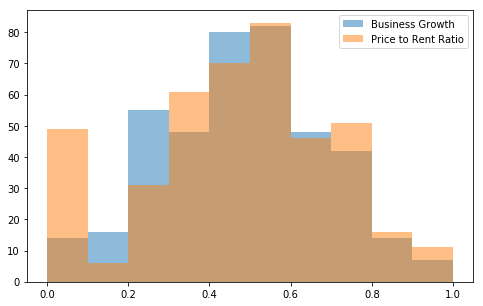

In [81]:
bg_trans = transform_data(comp_bg)
bg_norm2 = normalize_data(bg_trans)

graph_plots(bg_norm2,"Business Growth",pr_norm2,"Price to Rent Ratio")

In [83]:
test_data(bg_norm,pr_norm,bg_norm2,pr_norm2)

Before transforming data:
Ttest_indResult(statistic=-36.723617974897081, pvalue=3.8526731640733639e-162)
After transforming data:
Ttest_indResult(statistic=0.30321318749686227, pvalue=0.76180420740893739)


## How does the number of housing units affect the price to rent ratio?

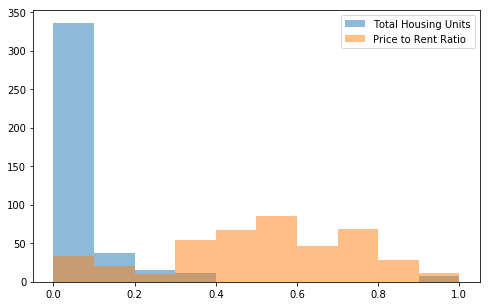

In [86]:
comp_hu = pop["Housing Units Total"]
hu_norm = normalize_data(comp_hu)

graph_plots(hu_norm,"Total Housing Units",pr_norm,"Price to Rent Ratio")

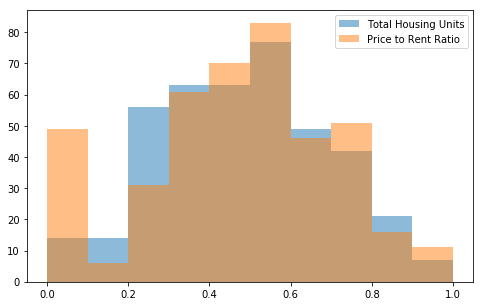

In [88]:
trans_hu = transform_data(comp_hu)
hu_norm2 = normalize_data(trans_hu)

graph_plots(hu_norm2,"Total Housing Units",pr_norm2,"Price to Rent Ratio")

In [89]:
test_data(hu_norm,pr_norm,hu_norm2,pr_norm2)

Before transforming data:
Ttest_indResult(statistic=-34.106258120706535, pvalue=7.6098538389494006e-152)
After transforming data:
Ttest_indResult(statistic=0.67847039223738947, pvalue=0.49766341273375525)


## How does the total number of building permits affect the price to rent ratio?

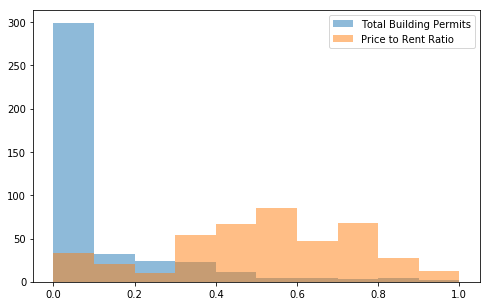

In [92]:
comp_bp = bp_data["Total_bldgs"]
bp_norm = normalize_data(comp_bp)

graph_plots(bp_norm,"Total Building Permits",pr_norm,"Price to Rent Ratio")

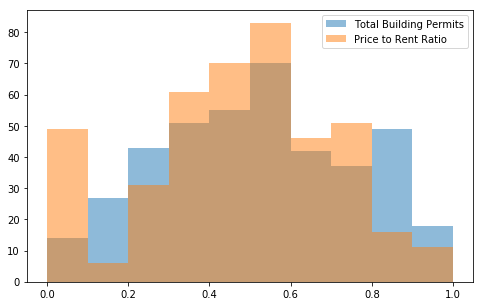

In [94]:
trans_bp = transform_data(comp_bp)
bp_norm2 = normalize_data(trans_bp)

graph_plots(bp_norm2,"Total Building Permits",pr_norm2,"Price to Rent Ratio")

In [96]:
test_data(bp_norm,pr_norm,bp_norm2,pr_norm2)

Before transforming data:
Ttest_indResult(statistic=-29.161641034755924, pvalue=2.2987712708395623e-127)
After transforming data:
Ttest_indResult(statistic=2.498584817546937, pvalue=0.012663093141757776)


## How does the crime rate affect the price to rent ratio?

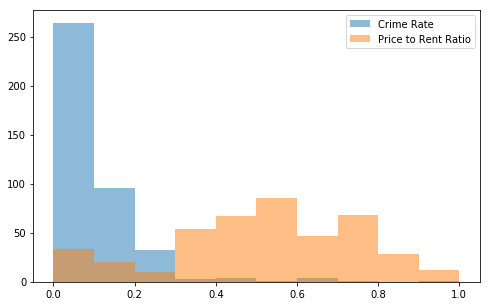

In [103]:
comp_cr = cr_freq["value"]
cr_norm = normalize_data(comp_cr)

graph_plots(cr_norm,"Crime Rate",pr_norm,"Price to Rent Ratio")

In [111]:
import scipy.special as sc
# use if boxcox is returning a negative value
trans_cr= transform_data(comp_cr)
#cr_norm2 = normalize_data(trans_cr)

#graph_plots(cr_norm2,"Crime Rate",pr_norm2,"Price to Rent Ratio")

display(comp_cr)

ValueError: Data must be positive.